In [3]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
# Import SQL Alchemy
from sqlalchemy import create_engine

# Import and establish Base for which classes will be constructed 
from sqlalchemy.ext.declarative import declarative_base


# Import modules to declare columns and column data types
from sqlalchemy import Column, Integer, String, Float, Boolean, delete

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func


In [2]:
#import CSV data
Base = declarative_base()
csv = 'Resources/AB_US_2020.csv'

data = pd.read_csv(csv, low_memory=False)
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [3]:
#drop unneeded columns
Airbnb_Rental_Property_information = data.drop(['id','name','host_id','neighbourhood_group','last_review'], axis=1)
Airbnb_Rental_Property_information.head()

,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city
0,Evelyne,28804,35.65146,-82.62792,Private room,60,1,138,1.14,1,0,Asheville
1,Celeste,28801,35.59779,-82.55540,Entire home/apt,470,1,114,1.03,11,288,Asheville
2,Lisa,28801,35.60670,-82.55563,Entire home/apt,75,30,89,0.81,2,298,Asheville
3,BonPaul,28806,35.57864,-82.59578,Entire home/apt,90,1,267,2.39,5,0,Asheville
4,Elizabeth,28801,35.61442,-82.54127,Private room,125,30,58,0.52,1,0,Asheville


In [4]:
cities = ['New York City', 'Los Angeles','Hawaii',
'San Diego','Broward County','Austin','Clark County','Washington D.C.',
'San Clara Country',    
'San Francisco',        
'Oakland',     
'San Mateo County',
'Santa Cruz County',     
'Pacific Grove']

data = Airbnb_Rental_Property_information[Airbnb_Rental_Property_information['city'].isin(cities)]         
data = data.reset_index(drop = True)
data.info()

data.to_csv(r'forjson.csv', index=False)

data['city'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171135 entries, 0 to 171134
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host_name                       171105 non-null  object 
 1   neighbourhood                   171135 non-null  object 
 2   latitude                        171135 non-null  float64
 3   longitude                       171135 non-null  float64
 4   room_type                       171135 non-null  object 
 5   price                           171135 non-null  int64  
 6   minimum_nights                  171135 non-null  int64  
 7   number_of_reviews               171135 non-null  int64  
 8   reviews_per_month               132309 non-null  float64
 9   calculated_host_listings_count  171135 non-null  int64  
 10  availability_365                171135 non-null  int64  
 11  city                            171135 non-null  object 
dtypes: float64(3), i

New York City        45756
Los Angeles          31536
Hawaii               22434
San Diego            12404
Broward County       10858
Austin               10436
Clark County          8408
Washington D.C.       7350
San Clara Country     7091
San Francisco         7053
Oakland               3204
San Mateo County      2855
Santa Cruz County     1571
Pacific Grove          179
Name: city, dtype: int64

In [5]:
#drop duplicates for specific longitude and latitude (i.e., variables)
newdf2 = data.drop_duplicates(subset=['latitude', 'longitude'])
newdf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165733 entries, 0 to 171134
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host_name                       165703 non-null  object 
 1   neighbourhood                   165733 non-null  object 
 2   latitude                        165733 non-null  float64
 3   longitude                       165733 non-null  float64
 4   room_type                       165733 non-null  object 
 5   price                           165733 non-null  int64  
 6   minimum_nights                  165733 non-null  int64  
 7   number_of_reviews               165733 non-null  int64  
 8   reviews_per_month               128999 non-null  float64
 9   calculated_host_listings_count  165733 non-null  int64  
 10  availability_365                165733 non-null  int64  
 11  city                            165733 non-null  object 
dtypes: float64(3), i

In [6]:
newdf2.shape

(165733, 12)

In [7]:
#export to csv file
newdf2.to_csv(r'Airbnb.csv', index=False)

In [8]:
#get mean and median data for key variables
mean_price = newdf2.groupby('city').agg({'price': 'mean'},{'reviews_per_month': 'mean'} )
mean_availability = newdf2.groupby('city').agg({'availability_365': 'mean'})
median_price = newdf2.groupby('city').agg({'price': 'median'})
median_reviews = newdf2.groupby('city').agg({'reviews_per_month': 'median'})
median_availability = newdf2.groupby('city').agg({'availability_365': 'median'})


In [9]:
df1 = pd.merge(mean_price, mean_availability, on="city")
df2 = pd.merge(df1,median_price, on="city")
df3 = pd.merge(df2,median_reviews, on="city")
df4 = pd.merge(df3,median_availability, on="city")

df4.columns = ['mean_price', 'mean_availability', 'median_price','median_reviews', 'median_availability']
df4

,mean_price,mean_availability,median_price,median_reviews,median_availability
city,,,,,
Austin,279.600680,121.076630,135.0,0.680,68
Broward County,232.555300,199.755492,129.0,0.880,195
Clark County,214.700618,186.286886,138.0,1.110,169
Hawaii,313.541600,223.395132,188.0,0.550,259
Los Angeles,224.371845,170.762913,108.0,0.860,158
New York City,148.697597,119.036517,100.0,0.360,45
Oakland,139.956604,114.943396,95.5,0.630,72
Pacific Grove,255.924419,173.360465,223.5,0.965,186
San Clara Country,162.789367,167.469662,100.0,0.800,158


C:\Users\Other\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


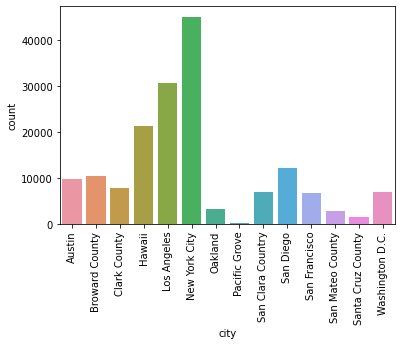

In [10]:
#Visualize frequency of rentals by specific city
sns.countplot("city",data=newdf2)
plt.xticks(rotation=90)
plt.savefig('static/images/Count_of_Rentalproperties_byCity.png', bbox_inches='tight')

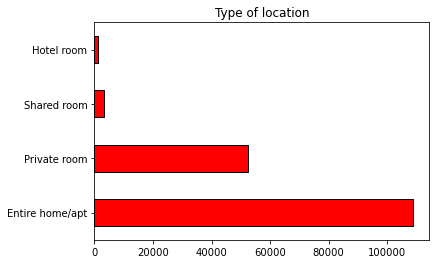

In [11]:
#visualize room type
newdf2['room_type'].value_counts().plot(kind='barh', figsize=(6,4), 
                                     edgecolor=(0,0,0),color='r', title='Type of location')
plt.savefig('static/images/Count_of_Rental Type.png', bbox_inches='tight')

In [12]:
# view descriptive statis for price
newdf2['price'].describe()

count    165733.000000
mean        220.324238
std         598.120065
min           0.000000
25%          75.000000
50%         121.000000
75%         200.000000
max       24999.000000
Name: price, dtype: float64

In [13]:
# Create the bins in which Data will be held

bins = [0, 100, 200, 400, np.inf]

# Create the names for the five bins
group_names = ["100 and below", "100 to 200", "200 to 400", "400 or more"]


newdf2['price_bins'] = pd.cut(newdf2['price'], bins, labels=group_names, include_lowest=True)
newdf2 = newdf2.reset_index(drop=True).sample(frac = .1)
newdf2


<ipython-input-13-d74d78d21b34>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf2['price_bins'] = pd.cut(newdf2['price'], bins, labels=group_names, include_lowest=True)


,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city,price_bins
28914,Evy And Robinette,Puna,19.41577,-154.96278,Private room,75,5,102,1.28,1,151,Hawaii,100 and below
16120,Oscar,Deerfield Beach,26.31872,-80.08773,Entire home/apt,77,91,1,0.46,1,358,Broward County,100 and below
87516,Robert,Williamsburg,40.71960,-73.95599,Entire home/apt,125,1,6,0.10,1,0,New York City,100 to 200
51977,Brandon,Venice,33.97419,-118.46110,Entire home/apt,235,30,26,0.47,12,296,Los Angeles,200 to 400
92692,Rob,Boerum Hill,40.68834,-73.98601,Private room,150,1,0,NaN,1,0,New York City,100 to 200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59930,Liana,East Hollywood,34.09876,-118.29709,Entire home/apt,125,30,58,1.61,1,334,Los Angeles,100 to 200
130592,Smil E-Realty,San Jose,37.38077,-121.89610,Private room,160,30,0,NaN,10,364,San Clara Country,100 to 200
70014,Nishan,Duarte,34.13954,-117.94890,Private room,75,1,2,0.14,1,365,Los Angeles,100 and below
61802,Margaret,Valley Glen,34.18167,-118.40178,Entire home/apt,185,3,20,0.96,1,109,Los Angeles,100 to 200


In [14]:
#Import Dependencies

engine = create_engine('sqlite:///save_pandas.db', echo=True)

sqlite_connection = engine.connect()

sqlite_table = "Airbnb_Analysis"
newdf2.to_sql(sqlite_table, sqlite_connection, if_exists='replace', index=False)
# sqlite_connection.execute('ALTER TABLE Airbnb_Analysis ADD PRIMARY KEY (`ID`)')
# sqlite_connection.execute('alter table Airbnb_Analysis drop id')
# sqlite_connection.execute('alter table Airbnb_Analysis add id serial primary key')

# group_export.to_sql(con=engine, name=example_table, if_exists='replace', 
#                     flavor='mysql', index=False)


    
    

2021-10-06 16:22:59,612 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Airbnb_Analysis")
2021-10-06 16:22:59,614 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-10-06 16:22:59,623 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Airbnb_Analysis")
2021-10-06 16:22:59,625 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-10-06 16:22:59,628 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2021-10-06 16:22:59,630 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-10-06 16:22:59,633 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("Airbnb_Analysis")
2021-10-06 16:22:59,634 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-10-06 16:22:59,647 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2021-10-06 16:22:59,652 INFO sqlalchemy.engine.Engine [raw sql] ('Airbnb_Analysis',)
2021-10-06 16:22:59,665 INFO sqlalchemy.engine.Engine PRAGMA

In [4]:

Airbnb_engine = create_engine('sqlite:///Airbnb_Analysis.sqlite', echo=True)

session = Session(Airbnb_engine)
# engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()
Base.prepare(Airbnb_engine, reflect=True)
Airbnb_Analysis = Base.classes.Airbnb_Analysis
# len(Airbnb_engine.execute('select * from Airbnb_Analysis').fetchall())


2021-10-06 16:45:35,732 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2021-10-06 16:45:35,735 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-10-06 16:45:35,739 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("Airbnb_Analysis")
2021-10-06 16:45:35,741 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-10-06 16:45:35,748 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2021-10-06 16:45:35,750 INFO sqlalchemy.engine.Engine [raw sql] ('Airbnb_Analysis',)
2021-10-06 16:45:35,759 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("Airbnb_Analysis")
2021-10-06 16:45:35,765 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-10-06 16:45:35,777 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("Airbnb_Analysis")
2021-10-06 16:45:35,782 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-10-06 16:45:35,787 INFO sqlalchemy.engine.E

In [17]:
print(Base.classes.keys())


['Airbnb_Analysis']


In [18]:
session.query(Airbnb_Analysis.Host_Name, Airbnb_Analysis.Price).all()

2021-10-06 16:25:01,783 INFO sqlalchemy.engine.Engine SELECT "Airbnb_Analysis"."Host_Name" AS "Airbnb_Analysis_Host_Name", "Airbnb_Analysis"."Price" AS "Airbnb_Analysis_Price" 
FROM "Airbnb_Analysis"
2021-10-06 16:25:01,785 INFO sqlalchemy.engine.Engine [generated in 0.00207s] ()


[('Paddy', 177.0),
 ('Paddy', 114.0),
 ('Sylvia', 99.0),
 ('Peggy', 46.0),
 ('Elizabeth', 39.0),
 ('Todd', 99.0),
 ('Amy', 139.0),
 ('Steven', 300.0),
 ('Dani', 176.0),
 ('April', 220.0),
 ('Stacey', 150.0),
 ('David', 50.0),
 ('Gina', 125.0),
 ('Elana', 117.0),
 ('Tiffany', 55.0),
 ('Chris', 38.0),
 ('Susan', 59.0),
 ('Robbie', 350.0),
 ('Belinda', 34.0),
 ('Flip', 117.0),
 ('Stephanie', 150.0),
 ('Lois', 102.0),
 ('Drew', 51.0),
 ('Lois', 155.0),
 ('Particular Properties', 159.0),
 ('Dolina', 119.0),
 ('Jason', 249.0),
 ('Stephanie', 150.0),
 ('Alyson & Max', 225.0),
 ('Becca', 470.0),
 ('Ellen And Andy', 85.0),
 ('Becky', 49.0),
 ('Vivian', 230.0),
 ('Christina', 112.0),
 ('Amy & Justin', 93.0),
 ('David', 110.0),
 ('Kelly', 104.0),
 ('Ash', 90.0),
 ('Kevin And Bob', 100.0),
 ('Peter', 485.0),
 ('Lynn', 400.0),
 ('Krista', 80.0),
 ('Chuck', 139.0),
 ('Carlos', 175.0),
 ('Carlos', 149.0),
 ('Jordan', 190.0),
 ('Keith And Shannon', 750.0),
 ('Julia', 240.0),
 ('E. Dixie', 65.0),
 ('Al

In [ ]:
sqlite_connection.close()

In [ ]:
# Create CW Class

# class AA(Base):
#     __tablename__ = 'Airbnb_Analysis'
#     __table_args__ = {'extend_existing': True}
#     id = Column(Integer, primary_key=True)
#     Host_Name = Column(String(255))
#     Neighbourhood = Column(String(255))
#     Latitude = Column(String(255))
#     Longitude = Column(String(255))
#     Room_Type = Column(String(255))
#     Price = Column(Float)
#     Minimum_Nights = Column(Float)
#     Number_of_Reviews = Column(Float)
#     Reviews_Per_Month = Column(Float)
#     Calculated_Host_Listings_Count = Column(Float)
#     Availability_365 = Column(Float)
#     City = Column(String(255))
#     Price_Bins = Column(String(255))
   

In [ ]:
# Create Database Connection. This is the code that is used to create SQLlite DB in the first place
# ----------------------------------
# Establish Connection
# engine = create_engine("sqlite:///Airbnb_Analysis.sqlite")
# conn = engine.connect()
# Base.metadata.create_all(conn)


In [ ]:
# from sqlalchemy.orm import Session
session = Session(bind=engine)
session.commit()


# for x in range(len(newdf2)):
#     info = AA(id = x+1,
#             Host_Name = newdf2['host_name'][x],
#             Neighbourhood = newdf2['neighbourhood'][x],
#             Latitude = newdf2['latitude'][x],
#             Longitude = newdf2['longitude'][x],
#             Room_Type = newdf2['room_type'][x],
#             Price = newdf2['price'][x],
#             Minimum_Nights = newdf2['minimum_nights'][x],
#             Number_of_Reviews = newdf2['number_of_reviews'][x],
#             Reviews_Per_Month = newdf2['reviews_per_month'][x],
#             Calculated_Host_Listings_Count = newdf2['calculated_host_listings_count'][x],
#             Availability_365 = newdf2['availability_365'][x],
#             City = newdf2['city'][x],
#             Price_Bins = newdf2['price_bins'][x]
#             )
#     session.add(info)
#     session.commit()

In [ ]:
#step 1:add states to the dataframe - NO
#step2: by year = total number of reviews for each property.....groupby(host,year,state) -  
#visualize by city, type, cost bins
#look for crime stats by zipcode
# mouse over # ratings, availability, 
#streetview
#dropdown
# house view
#price distribution across state with heatmap. - tourist attraction
#dropdown price distribution (heatmap, cholorepht)
#house type/price range 

Cluster and heatmap - Raheem
cholorepht and Overlay maps - Vi


In [ ]:


url = "https://crimescore.p.rapidapi.com/crimescore"

querystring = {"lat":"38.08809","lon":"-85.679626","f":"json","id":"174"}

headers = {
    'x-rapidapi-host': "crimescore.p.rapidapi.com",
    'x-rapidapi-key': "SIGN-UP-FOR-KEY"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)